<a href="https://colab.research.google.com/github/manolosake/DataScience/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

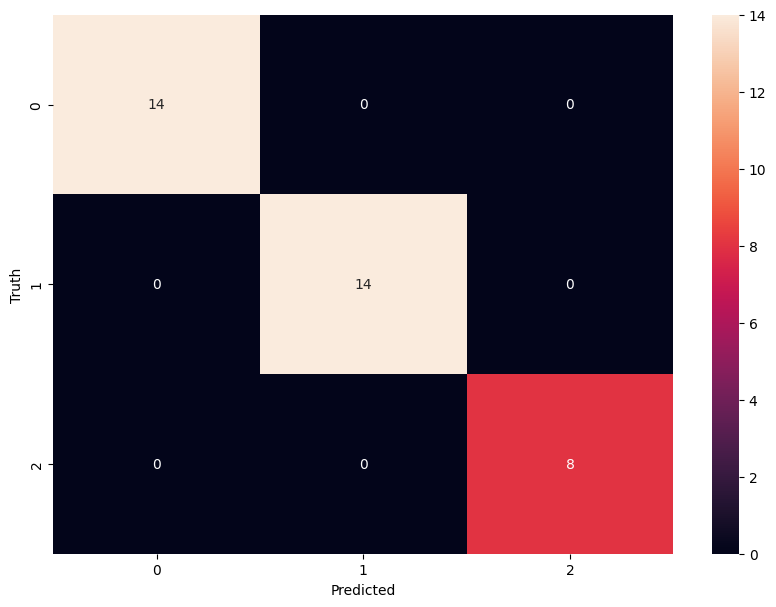

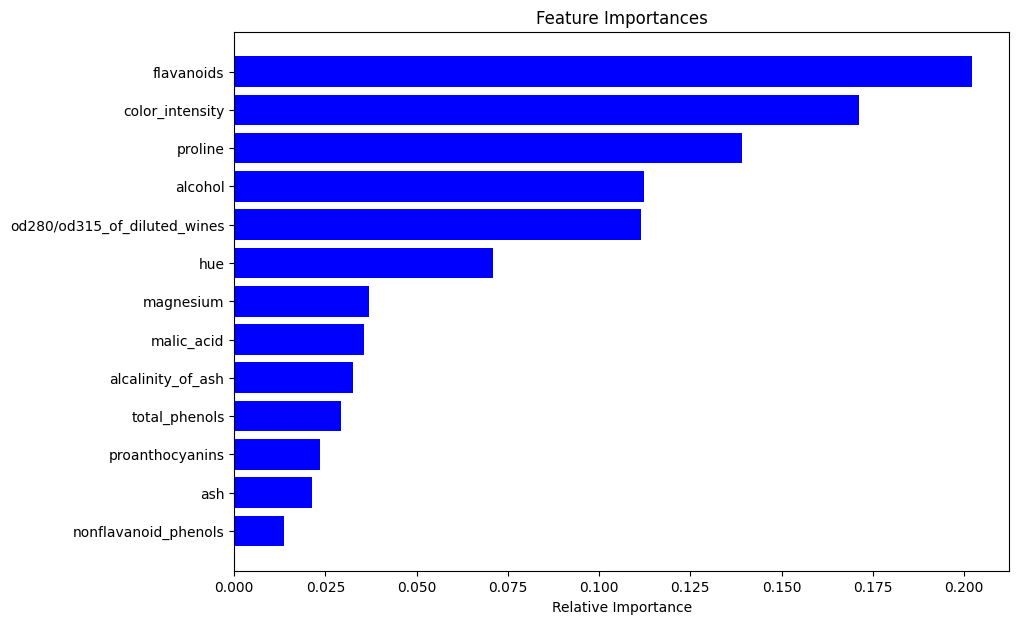

In [3]:
#Classification

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Random Forest is a supervised learning model that uses multiple decision trees during training.
# It outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
# Random Forests are great with:
# 1. Large data sets: It can handle thousands of input variables and identify most significant ones.
# 2. Multivariate data: It solves regression and classification problems.
# 3. Overfitting: The model is less likely to overfit the data due to the ensemble method.
# 4. Outliers: It is less sensitive to outliers as it takes the average of all predictions, which cancels out the biases.

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rfc.predict(X_test)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Use seaborn to create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Show the plot
plt.show()

# Plot feature importance
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [wine.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Mean Squared Error: 5.739457265822783


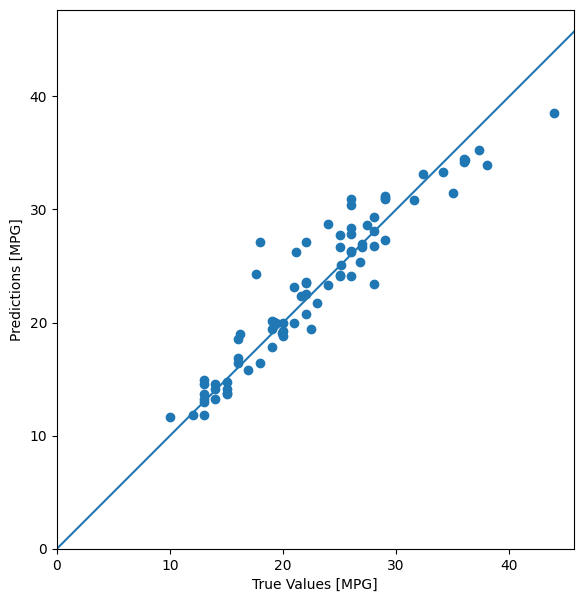

In [5]:
#Regression

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Drop rows with missing values
df = df.dropna()

# The 'Origin' column is categorical, not numeric. Convert that to a one-hot.
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, prefix='', prefix_sep='')

# Split data into targets (y) and inputs (X)
y = df.pop('MPG')
X = df.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression Model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Predict the values of the test set
y_pred = rfr.predict(X_test)

# Calculate and print the mean squared error of our predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot true values vs predictions
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()